 # Student Marks Prediction

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
cd D:\Data scientist file\Data sets

D:\Data scientist file\Data sets


In [3]:
df=pd.read_csv("StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape 

(1000, 8)

Number of rows 1000 and 8 columns

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


There is no null value in the dataset. 

and 5 object type columns and 3 int type columns.

In [6]:
df['total_score']=df[["math score","reading score","writing score"]].sum(axis=1)

In [7]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [8]:
gender=pd.get_dummies(df['gender'],drop_first=True)
gender

,male
0,0
1,0
2,0
3,1
4,1
...,...
995,0
996,1
997,0
998,0


In [9]:
df=pd.concat([df,gender],axis=True)

In [10]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,male
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0
1,female,group C,some college,standard,completed,69,90,88,247,0
2,female,group B,master's degree,standard,none,90,95,93,278,0
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1
4,male,group C,some college,standard,none,76,78,75,229,1


In [11]:
df['race/ethnicity'].value_counts()

group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64

In [12]:
df["parental level of education"].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [13]:
df["lunch"].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

In [14]:
df["test preparation course"].value_counts

<bound method IndexOpsMixin.value_counts of 0           none
1      completed
2           none
3           none
4           none
         ...    
995    completed
996         none
997    completed
998    completed
999         none
Name: test preparation course, Length: 1000, dtype: object>

In [15]:
group=pd.get_dummies(df["race/ethnicity"],drop_first=True)
education=pd.get_dummies(df["parental level of education"],drop_first=True)
lunch=pd.get_dummies(df["lunch"],drop_first=True)
course=pd.get_dummies(df["test preparation course"],drop_first=True)

In [16]:
df=pd.concat([df,group,education,lunch,course],axis=1)

In [17]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,male,...,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,female,group B,bachelor's degree,standard,none,72,72,74,218,0,...,0,0,0,1,0,0,0,0,1,1
1,female,group C,some college,standard,completed,69,90,88,247,0,...,1,0,0,0,0,0,1,0,1,0
2,female,group B,master's degree,standard,none,90,95,93,278,0,...,0,0,0,0,0,1,0,0,1,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,1,...,0,0,0,0,0,0,0,0,0,1
4,male,group C,some college,standard,none,76,78,75,229,1,...,1,0,0,0,0,0,1,0,1,1


In [18]:
df.drop(["gender","race/ethnicity","parental level of education","lunch","test preparation course"],axis=1,inplace=True)


In [19]:
df.head()

,math score,reading score,writing score,total_score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,72,72,74,218,0,1,0,0,0,1,0,0,0,0,1,1
1,69,90,88,247,0,0,1,0,0,0,0,0,1,0,1,0
2,90,95,93,278,0,1,0,0,0,0,0,1,0,0,1,1
3,47,57,44,148,1,0,0,0,0,0,0,0,0,0,0,1
4,76,78,75,229,1,0,1,0,0,0,0,0,1,0,1,1


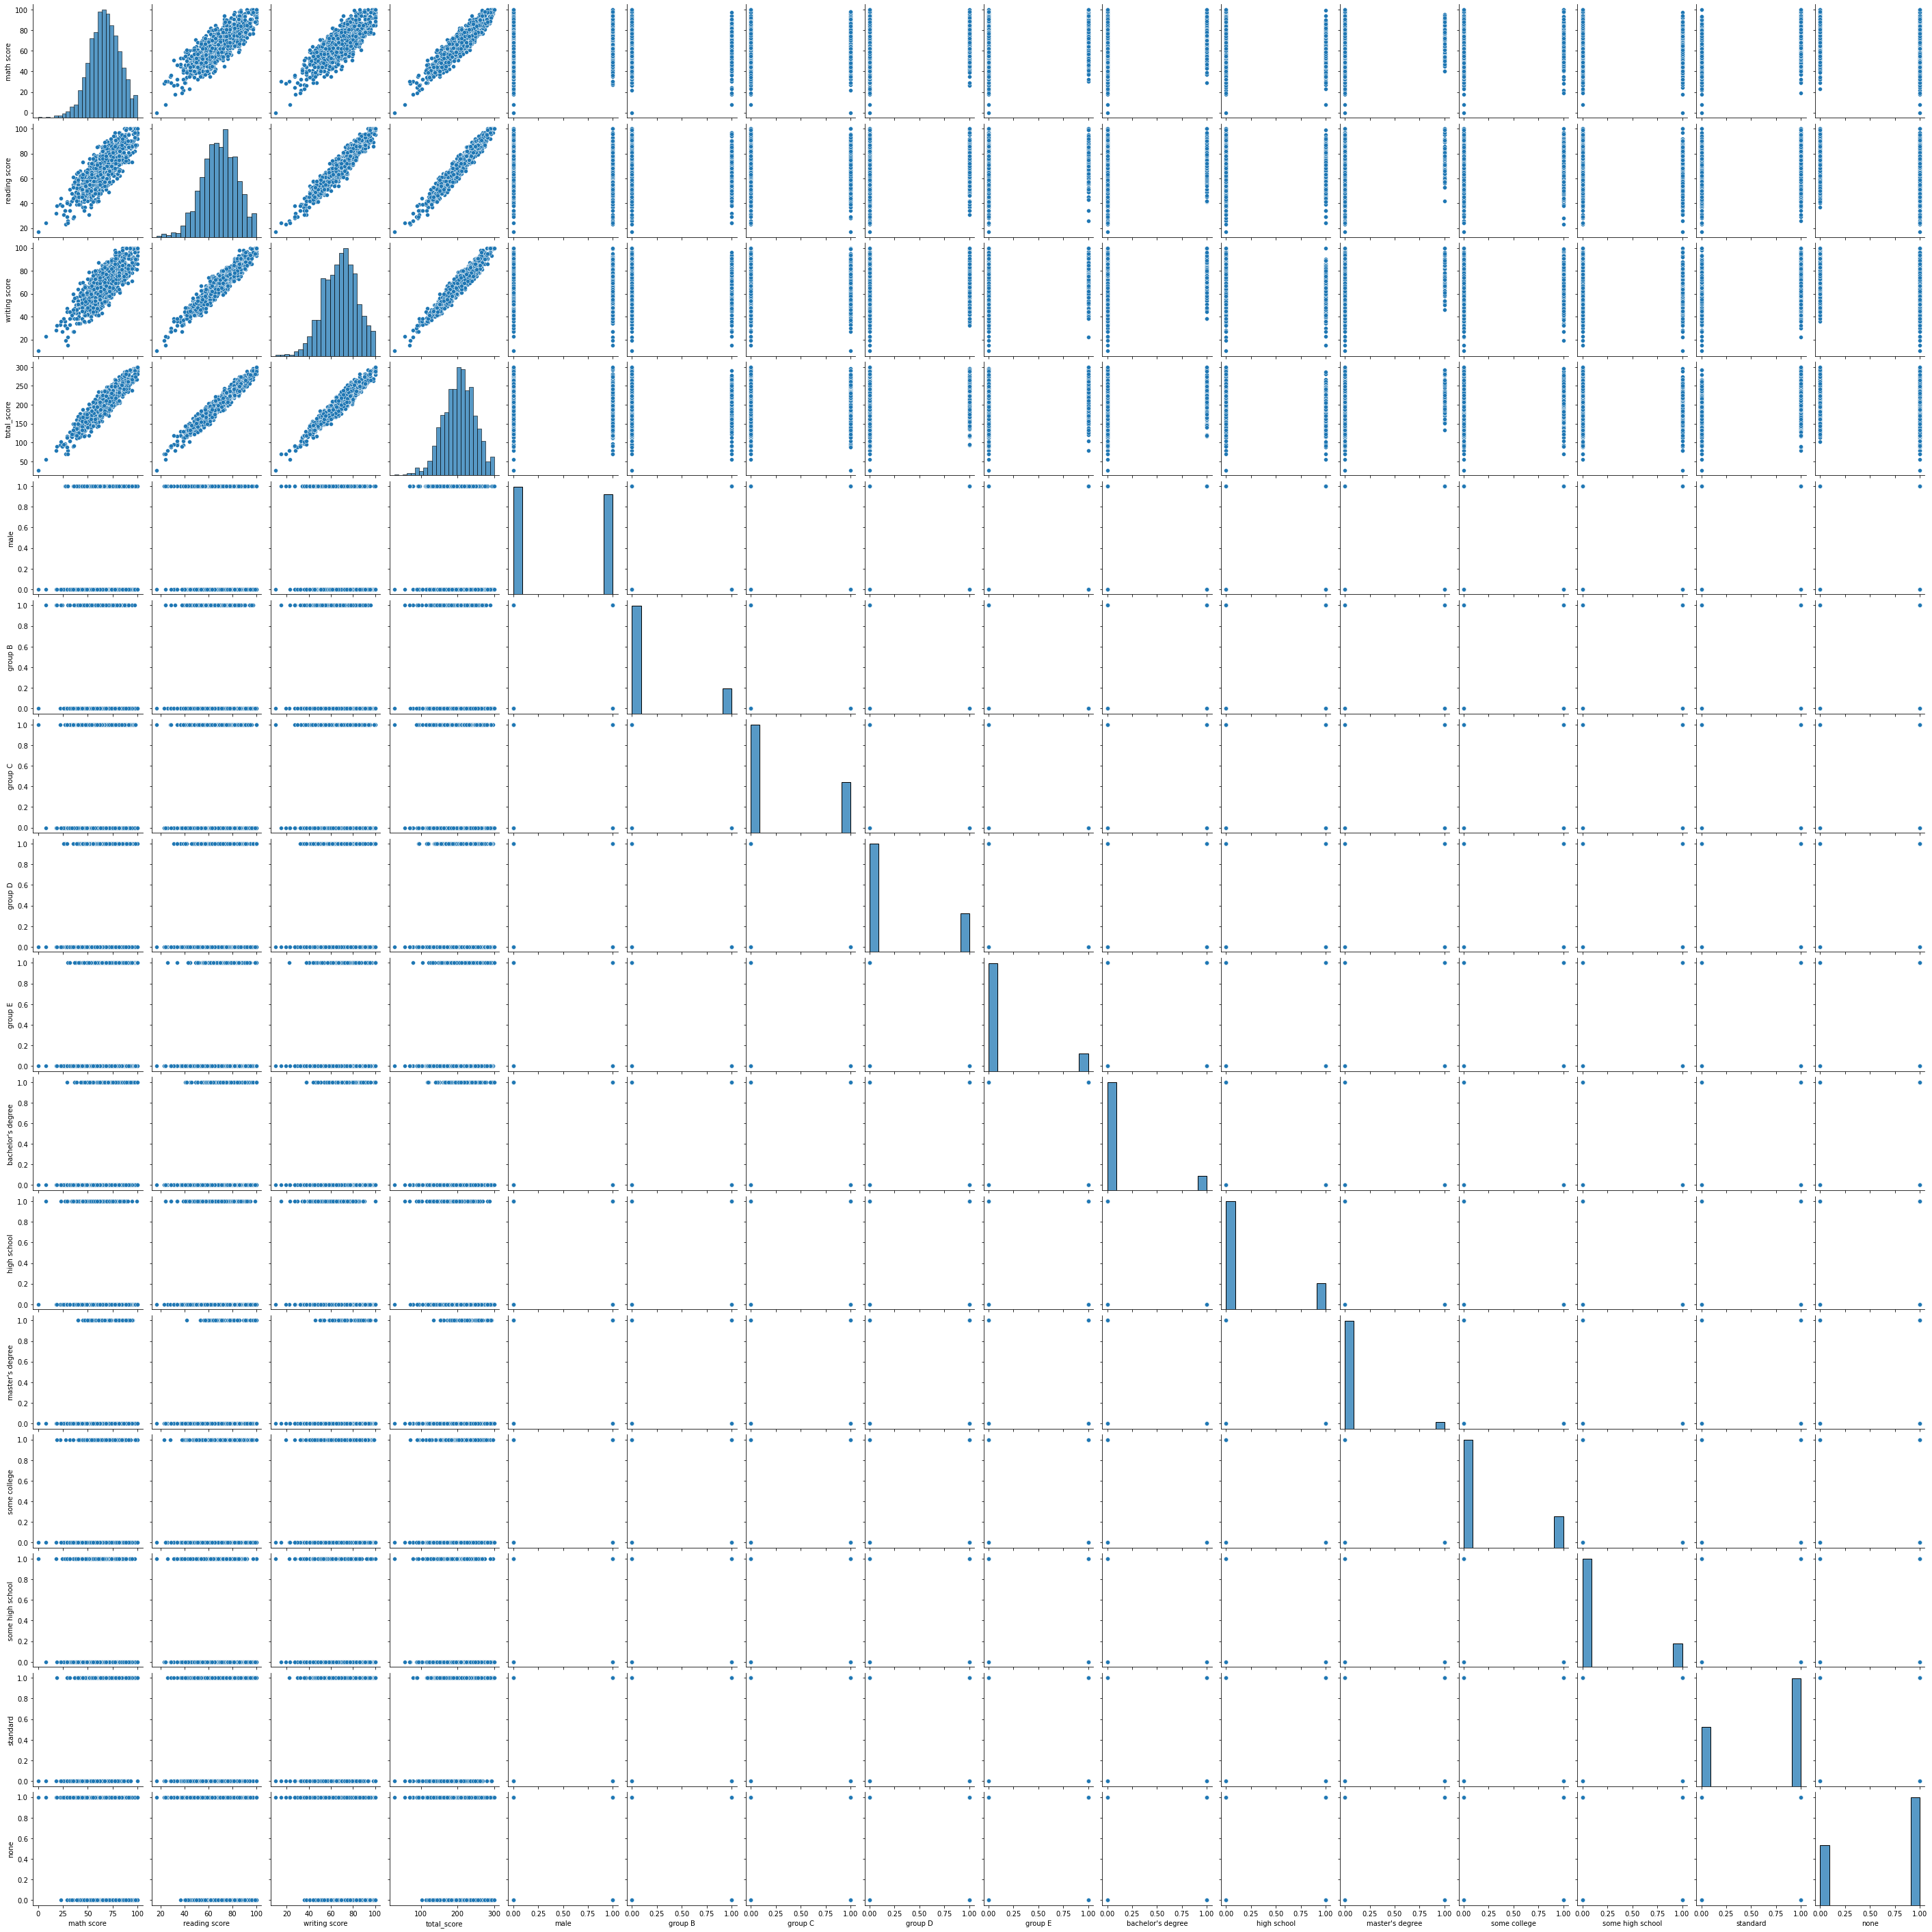

In [20]:
sns.pairplot(data=df)

<AxesSubplot:>

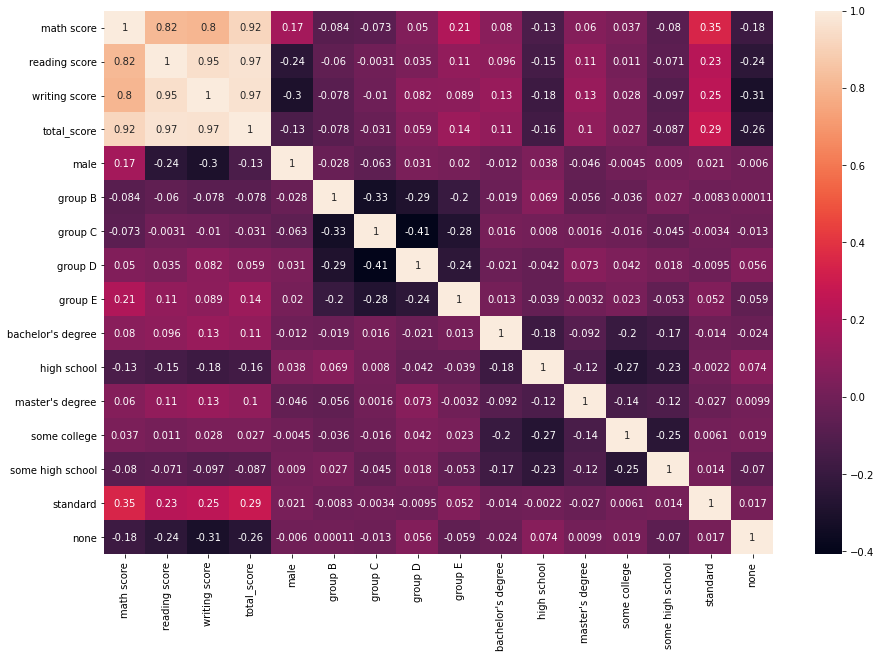

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True)

In [22]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [23]:
df=pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [24]:
df.head()

,math score,reading score,writing score,total_score,male,group B,group C,group D,group E,bachelor's degree,high school,master's degree,some college,some high school,standard,none
0,0.390024,0.193999,0.391492,0.343574,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,2.733967,-0.493742,-0.250398,-0.540361,-0.466933,0.741881,0.746748
1,0.192076,1.427476,1.313269,1.021927,-0.964625,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,-1.339140
2,1.577711,1.770109,1.642475,1.747064,-0.964625,2.064742,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,3.993639,-0.540361,-0.466933,0.741881,0.746748
3,-1.259543,-0.833899,-1.583744,-1.293830,1.036672,-0.484322,-0.684419,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,-0.540361,-0.466933,-1.347925,0.746748
4,0.653954,0.605158,0.457333,0.600881,1.036672,-0.484322,1.461094,-0.59583,-0.403473,-0.365769,-0.493742,-0.250398,1.850616,-0.466933,0.741881,0.746748


In [25]:
X=df.drop('total_score',axis=1)
y=df['total_score']

In [26]:
from sklearn.model_selection import train_test_split,cross_val_score

In [27]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

# Linear Regression 

In [28]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [29]:
lr.fit(X_train,y_train)

LinearRegression()

In [30]:
print(lr.score(X_test,y_test))

1.0


In [31]:
lr_pred=lr.predict(X_test)

In [32]:
from sklearn.metrics import r2_score

In [33]:
acc_LR=r2_score(y_test,lr_pred)
print("Accuracy of Linear Regression model:",acc_LR)

Accuracy of Linear Regression model: 1.0


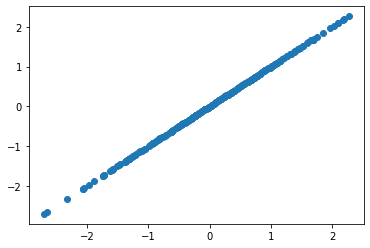

In [34]:
plt.scatter(y_test,lr_pred)

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:305: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='total_score', ylabel='Density'>

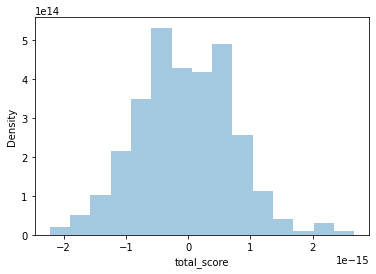

In [35]:
sns.distplot(y_test-lr_pred)

In [36]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,lr_pred))
print('MSE:', metrics.mean_squared_error(y_test,lr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test,lr_pred)))

MAE: 6.3843606327533095e-16
MSE: 6.256198906210025e-31
RMSE: 7.909613711307288e-16


# Random Forest regressor 

In [37]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()

In [38]:
rf.fit(X_train,y_train)

RandomForestRegressor()

In [39]:
print(rf.score(X_test,y_test))

0.997334306791875


In [40]:
rf_pred=rf.predict(X_test)

In [41]:
acc_RF=r2_score(y_test,rf_pred)
print("Accuracy of Random Forest model:",acc_RF)

Accuracy of Random Forest model: 0.997334306791875


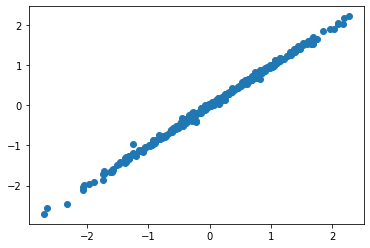

In [42]:
plt.scatter(y_test,rf_pred)

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_score', ylabel='Density'>

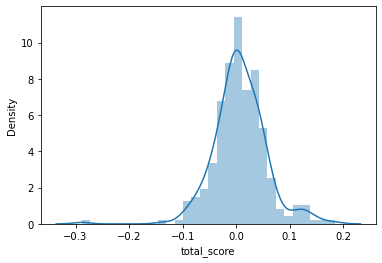

In [43]:
sns.distplot(y_test-rf_pred)

In [44]:
from sklearn import metrics
print('MAE:',metrics.mean_absolute_error(y_test,rf_pred))
print('MSE:',metrics.mean_squared_error(y_test,rf_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,rf_pred)))

MAE: 0.03566812654607404
MSE: 0.0025031162839572654
RMSE: 0.05003115313439483


# Decision Tree Regressor 

In [45]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()

In [46]:
dtr.fit(X_train,y_train)

DecisionTreeRegressor()

In [47]:
print("Decission Tree:",dtr.score(X_test,y_test))


Decission Tree: 0.9873185066884146


In [48]:
dt_pred=dtr.predict(X_test)

In [49]:
acc_DT=r2_score(y_test,dt_pred)
print("Accuracy of Decision Tree model:",acc_DT)

Accuracy of Decision Tree model: 0.9873185066884146


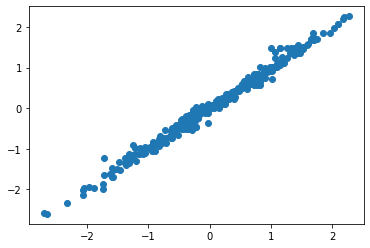

In [50]:
plt.scatter(y_test,dt_pred)

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_score', ylabel='Density'>

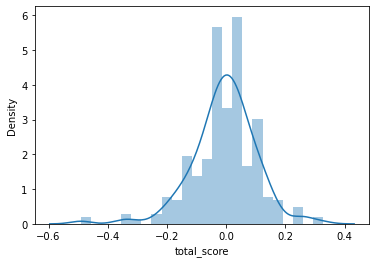

In [51]:
sns.distplot(y_test-dt_pred)

In [52]:
print('MAE:',metrics.mean_absolute_error(y_test,dt_pred))
print('MSE:',metrics.mean_squared_error(y_test,dt_pred))
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,dt_pred)))

MAE: 0.07867338438078203
MSE: 0.011908066658372568
RMSE 0.10912408835070544


# Support vector 

In [53]:
from sklearn.svm import SVR
svr=SVR()

In [54]:
svr.fit(X_train,y_train)

SVR()

In [55]:
print('Support Vector Regressor:',svr.score(X_train,y_train))

Support Vector Regressor: 0.9928278732528465


In [56]:
sv_pred=svr.predict(X_test)

In [57]:
acc_SV=r2_score(y_test,sv_pred)
print("Accuracy of Support vector model:",acc_SV)

Accuracy of Support vector model: 0.9861096586452416


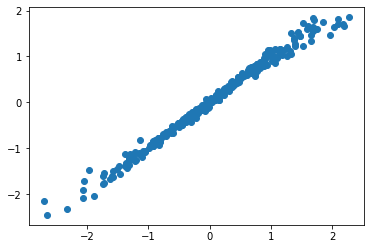

In [58]:
plt.scatter(y_test,sv_pred)

C:\Users\Windows 7\anaconda3\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='total_score', ylabel='Density'>

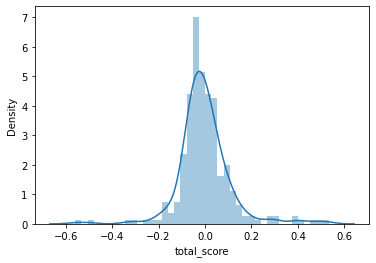

In [59]:
sns.distplot(y_test-sv_pred)

In [60]:
print('MAE:',metrics.mean_absolute_error(y_test,sv_pred))
print('MSE:',metrics.mean_squared_error(y_test,sv_pred))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test,sv_pred)))

MAE: 0.07332461551776705
MSE: 0.013043188739365729
RMSE: 0.11420678061904087


In [61]:
model=pd.DataFrame({
    'Model':['Logistic Regression', 'Decision Tree ', 'Random Forest','Support Vector Machine'],
'Score': [acc_LR,acc_DT,acc_RF,acc_SV]})
model.sort_values(by='Score',ascending=False)

,Model,Score
0,Logistic Regression,1.000000
2,Random Forest,0.997334
1,Decision Tree,0.987319
3,Support Vector Machine,0.986110
